## Import libraries

In [1]:
# Tensorflow and tf.keras
import os
import pandas as pd
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.6.0


In [2]:
# Download and create image shape

import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings
#from keras.layers import MaxPooling2D, Flatten, Conv2D


# Exploratory Data Analysis (EDA) - Pneumonia Detection  

### Chest x-xray images 

In [15]:
# chest_xray directory

DATADIR = "../chest_xray/"

## Data Wrangling and Exploratory Data Analysis (EDA)

### Define the paths to each file

In [16]:
#Use os.path.join() method to access the file through the direcectory
train_dir = os.path.join(DATADIR, 'train')
val_dir = os.path.join(DATADIR, 'val')
test_dir = os.path.join(DATADIR, 'test')

In [17]:
# Colllect Pnemonia data from files
pneumonia_train_dir = os.path.join(train_dir,'PNEUMONIA')
pneumonia_val_dir = os.path.join(val_dir, 'PNEUMONIA')
pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')

In [18]:
# agggregate Normal data from the files
normal_train_dir = os.path.join(train_dir, 'NORMAL')
normal_val_dir = os.path.join(val_dir, 'NORMAL')
normal_test_dir = os.path.join(test_dir, 'NORMAL')

In [19]:
# check the size of pneumonia in the dataset
pneumonia_train_images = len(os.listdir(pneumonia_train_dir))
pneumonia_val_images = len(os.listdir(pneumonia_val_dir))
pneumonia_test_images = len(os.listdir(pneumonia_test_dir))

In [20]:
# Check the size of normal in the dataset
normal_train_images = len(os.listdir(normal_train_dir))
normal_val_images = len(os.listdir(normal_val_dir))
normal_test_images = len(os.listdir(normal_test_dir))

### The subtotal images per classes in each file

In [21]:
print('*' * 40)
print(f'Total training images: {pneumonia_train_images + normal_train_images}')
print(f'Pneumonia: {pneumonia_train_images}')
print(f'Noraml: {normal_train_images}')
print('*'*40)

print(f'Total validation images: {pneumonia_val_images + normal_val_images}')
print(f'Pneumomian: {pneumonia_val_images}')
print(f'Normal: {normal_val_images}')
print('*'*40)
#print('\n')
print(f'Total test images: {pneumonia_test_images + normal_test_images}')
print(f'Pneumonia test images: {pneumonia_test_images}')
print(f' Nomal test images: {normal_test_images}')
print('*' * 40)

****************************************
Total training images: 5111
Pneumonia: 3814
Noraml: 1297
****************************************
Total validation images: 124
Pneumomian: 70
Normal: 54
****************************************
Total test images: 624
Pneumonia test images: 390
 Nomal test images: 234
****************************************


In [22]:
# Gathering the data from the respective folders 

pneumonia = sum([pneumonia_train_images, pneumonia_val_images, pneumonia_test_images])
normal = sum([normal_train_images, normal_val_images, normal_test_images])

print(f"The total number of pneumonia infected dataset is: {pneumonia} ")
print(f"The total number of non infected dataset is: {normal}")

The total number of pneumonia infected dataset is: 4274 
The total number of non infected dataset is: 1585


# Data Visualization

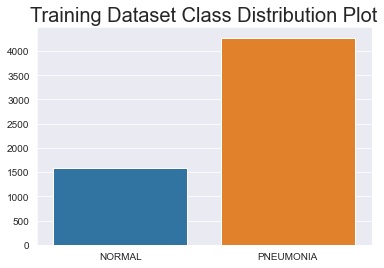

In [23]:
sn.barplot(x =["NORMAL", 'PNEUMONIA'], y =[normal, pneumonia])
plt.title("Training Dataset Class Distribution Plot", size = 20)
sn.set_style('darkgrid')
plt.show()

## The propertion of each dataset  per clasess

<Figure size 576x576 with 0 Axes>

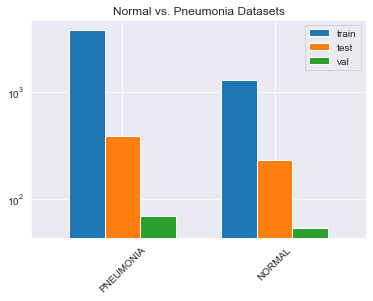

,train,test,val
PNEUMONIA,3814,390,70
NORMAL,1297,234,54


In [27]:
category = [ "PNEUMONIA", "NORMAL"]

df = pd.DataFrame({'train':[pneumonia_train_images, normal_train_images],'test':[pneumonia_test_images,

# Distribution of dataset plot
plt.figure(figsize=(8, 8))
df.plot(kind='bar', rot =45, width=0.7)
plt.yscale('log')
plt.legend(loc= 'best')
plt.title('Normal vs. Pneumonia Datasets')
plt.show()

df.head()

### Preprocessing scaling images and some augmentation technique parameters

In [13]:
# Data agumentation only for training data
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            shear_range=0.2,
            zoom_range = 0.2,
            horizontal_flip = True)

## Create data generator using ImageDataGenerator()

In [30]:
# test data only scaled 
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
                                        '../chest_xray/train',
                                    target_size=(220,220),
                                    batch_size = 32,
                                    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory('../chest_xray/test',
                                                       target_size= (220, 220),
                                                       batch_size = 32,
                                                       class_mode = 'binary')

Found 5099 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Visualize some images for classes

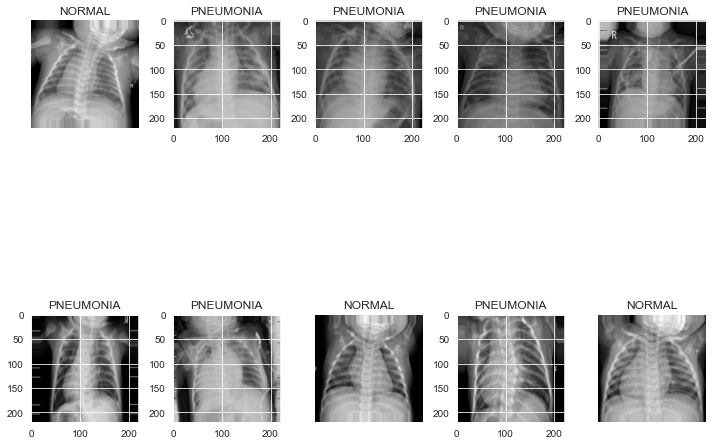

In [32]:
images_batch, label_batch = next(iter(train_generator))


def show_batch(images_batch, label_batch):
    plt.figure(figsize=(10,10))
    for i in range(0, 10):
        ax= plt.subplot(2, 5, i+1)
        plt.imshow(images_batch[i])
        if label_batch[i]:
            plt.title("PNEUMONIA")
        else:
            plt.title('NORMAL')
            plt.axis('off')
    plt.tight_layout()
show_batch(images_batch, label_batch)

### Summary

Lung images infected with pneumonia show irregularly more whites than the normal lung, however, few lung images are misleading to classify with the naked eye, which usually makes image classification difficult. Generally, data imbalance between the two classes is a concern for biases and model overfitting.
